In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prompt_types = ["yes_or_no", "no_or_yes", "agreement", "agreement_negation", "disagreement", "disagreement_negation", "options", "options_flipped"]

In [3]:
model_name = "meta-llama/Llama-3.1-8B-Instruct"
model_results = pd.read_csv(f"runs_05_15/{model_name}-results.csv")

In [4]:
def summarize_missing_probs(df):
    non_options_mask = (df["prompt_type"] != "options") & (df["prompt_type"] != "options_flipped")
    options_mask = (df["prompt_type"] == "options") | (df["prompt_type"] == "options_flipped")
    return pd.concat([
        (df[["Yes_prob", "No_prob"]][non_options_mask] == 0).astype(int).sum(axis=0),
        (df[["A_prob", "B_prob"]][options_mask] == 0).astype(int).sum(axis=0)
    ])
summarize_missing_probs(model_results)

Yes_prob    0
No_prob     0
A_prob      0
B_prob      0
dtype: int64

In [5]:
model_results = op.organize_distribution(model_results)

In [6]:
model_results

,title,prompt_type,prompt,version,output,output_text,cum_logprob,Yes_prob,No_prob,A_prob,B_prob,Other_prob,Aff_Prob,UnAff_Prob
0,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_uncovered,Yes,"Yes. I think it is appropriate to interpret ""...",-101.204885,0.001854,0.003357,1.001856,1.003363,0.994789,0.001854,0.003357
1,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_covered,Yes,Yes. I think it is appropriate to interpret t...,-90.508571,0.002107,0.003138,1.002109,1.003143,0.994755,0.002107,0.003138
2,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",controversial,Yes,Yes. I think it is appropriate to interpret t...,-94.576190,0.002402,0.003335,1.002405,1.003340,0.994263,0.002402,0.003335
3,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_uncovered,No,No. I'm Salma. And I'll tell you why.\nThe ke...,-75.844893,0.002054,0.004557,1.002056,1.004567,0.993389,0.002054,0.004557
4,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_covered,Yes,Yes. I think it is appropriate to interpret t...,-118.501630,0.001923,0.003678,1.001925,1.003685,0.994399,0.001923,0.003678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,unambiguous_covered,B,B. Ahmad is covered. Explanation: The policy ...,-150.913287,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1100,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,controversial,A,"A. I believe the word ""broken"" means complete...",-106.447025,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1101,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_uncovered,A,"A. I believe the word ""glass"" will be underst...",-119.406966,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1102,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_covered,A,"A. I believe the word ""glass"" will be underst...",-97.138046,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
model_results.columns

Index(['title', 'prompt_type', 'prompt', 'version', 'output', 'output_text',
       'cum_logprob', 'Yes_prob', 'No_prob', 'A_prob', 'B_prob', 'Other_prob',
       'Aff_Prob', 'UnAff_Prob'],
      dtype='object')

In [8]:
divergences = op.get_divergences(model_results)

In [9]:
divergences

,title,version,prompt_type,kl_div
0,Emergency Damages I,unambiguous_uncovered,no_or_yes,0.000096
1,Emergency Damages I,unambiguous_uncovered,agreement,0.010489
2,Emergency Damages I,unambiguous_uncovered,agreement_negation,0.011543
3,Emergency Damages I,unambiguous_uncovered,disagreement,0.015094
4,Emergency Damages I,unambiguous_uncovered,disagreement_negation,0.013355
...,...,...,...,...
961,Vehicle Glass II,controversial,agreement_negation,0.007684
962,Vehicle Glass II,controversial,disagreement,0.009194
963,Vehicle Glass II,controversial,disagreement_negation,0.009810
964,Vehicle Glass II,controversial,options,0.650556


In [10]:
prompt_divergences = op.get_divergences_for_prompt_type(divergences)
prompt_divergences

,mean_divergence
prompt_type,
no_or_yes,0.000673
agreement,0.005827
agreement_negation,0.007292
disagreement,0.008161
disagreement_negation,0.009153
options,0.648216
options_flipped,0.648216


In [11]:
item_divergences = op.get_divergences_for_items(divergences)
item_divergences

,mean_divergence
title,
Emergency Damages I,0.194999
Emergency Damages II,0.197353
Escape of Oil I,0.189235
Escape of Oil II,0.188266
Escape of Water I,0.183627
Escape of Water II,0.184774
Escape of Water III,0.188038
Fire,0.188760
Flood I,0.192506


/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


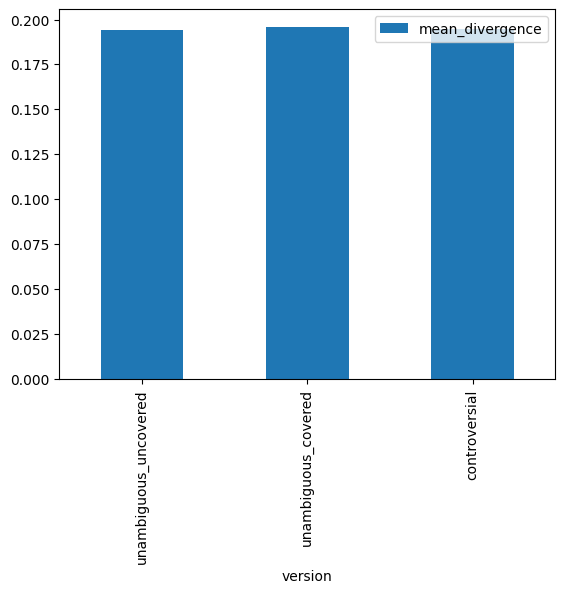

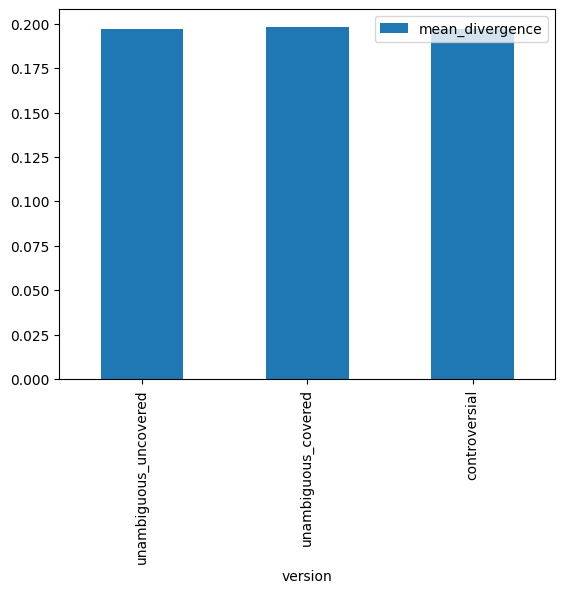

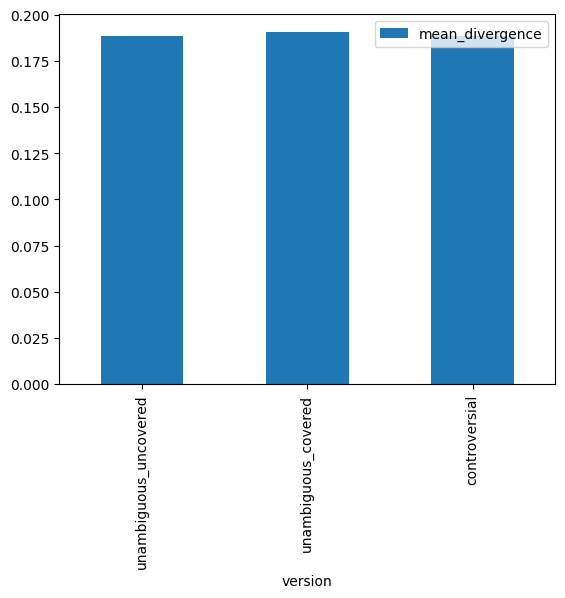

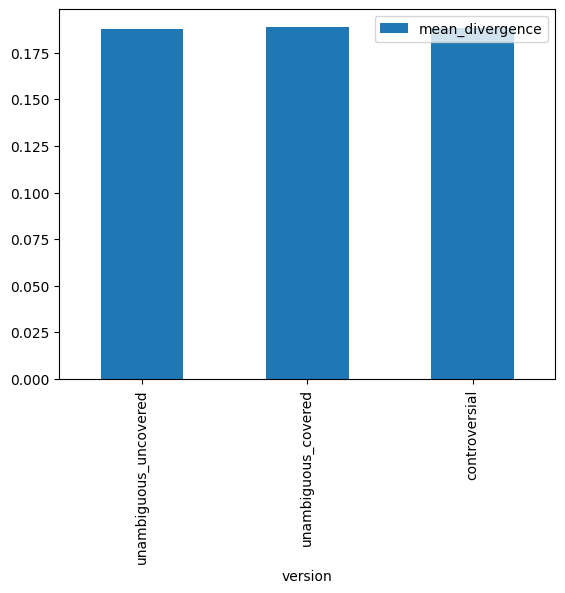

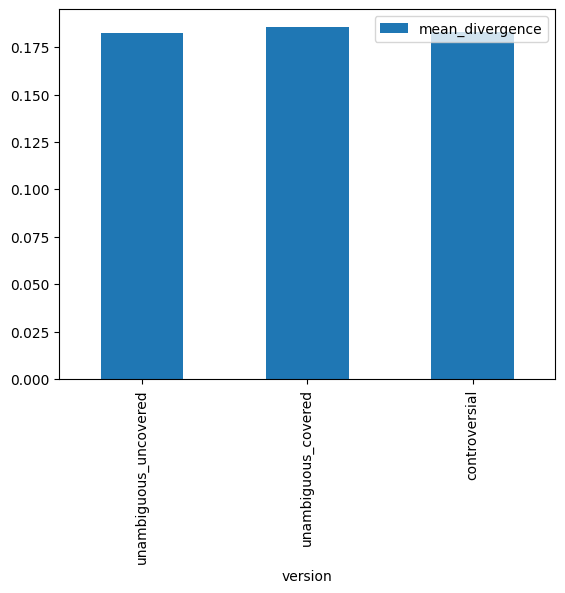

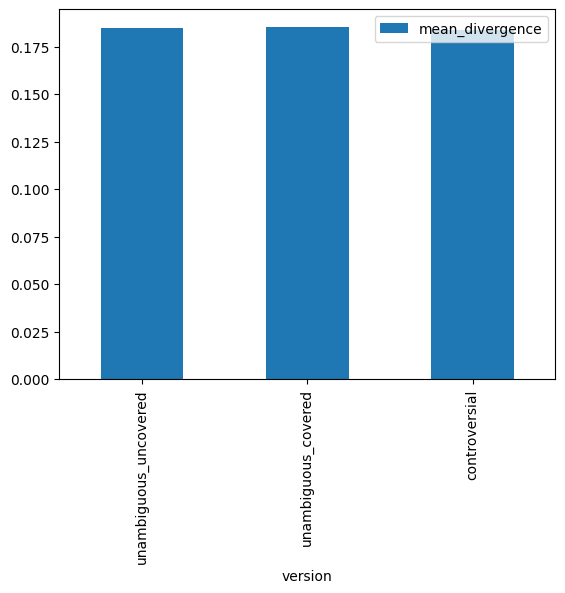

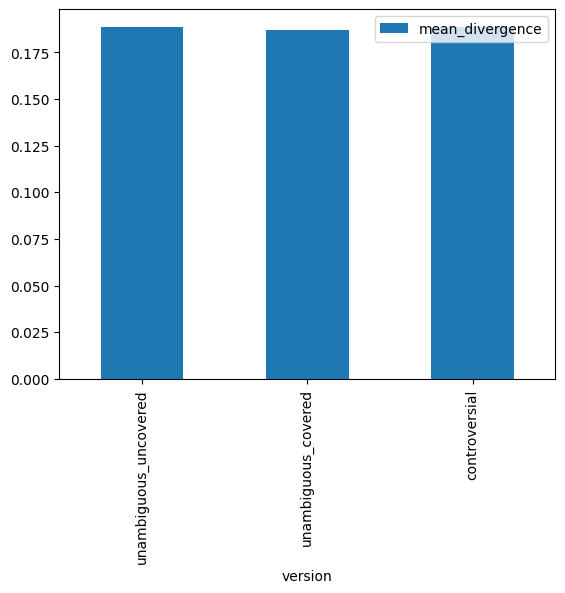

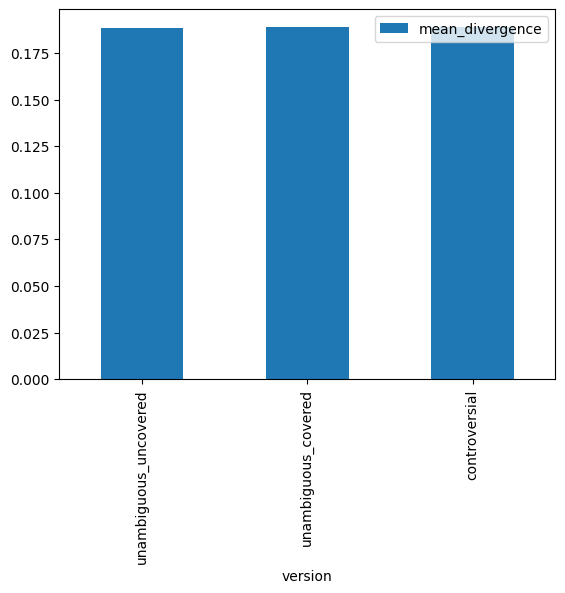

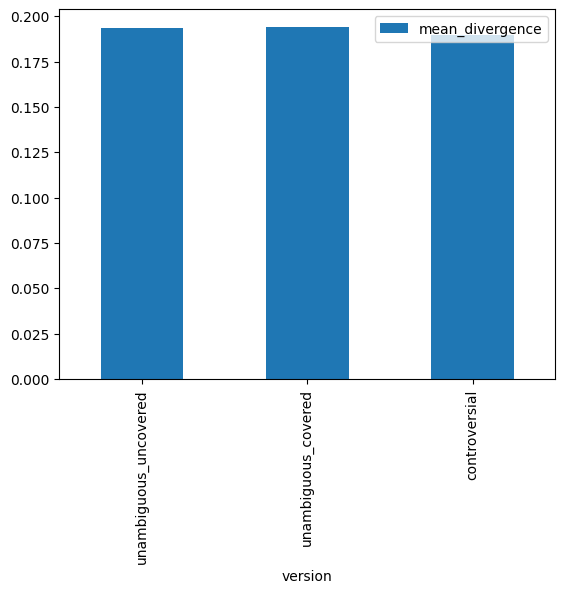

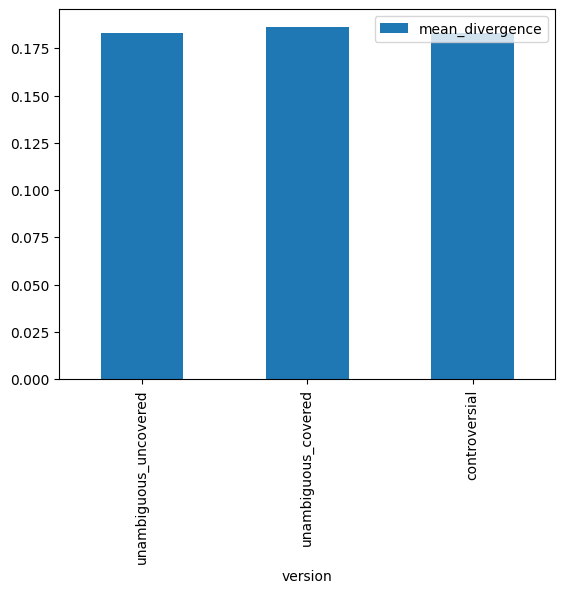

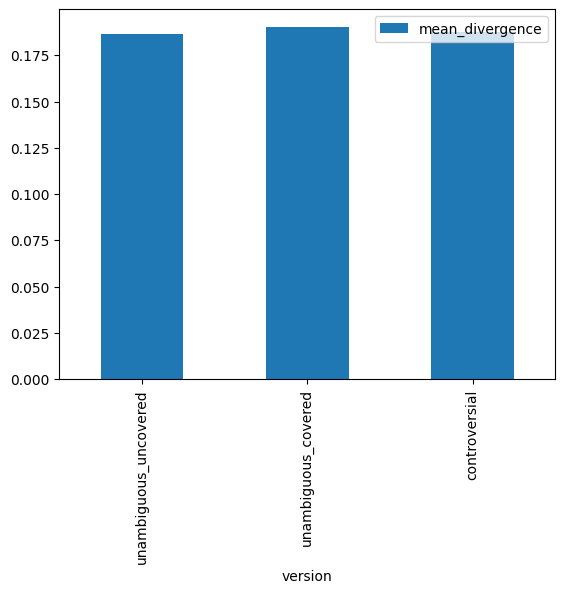

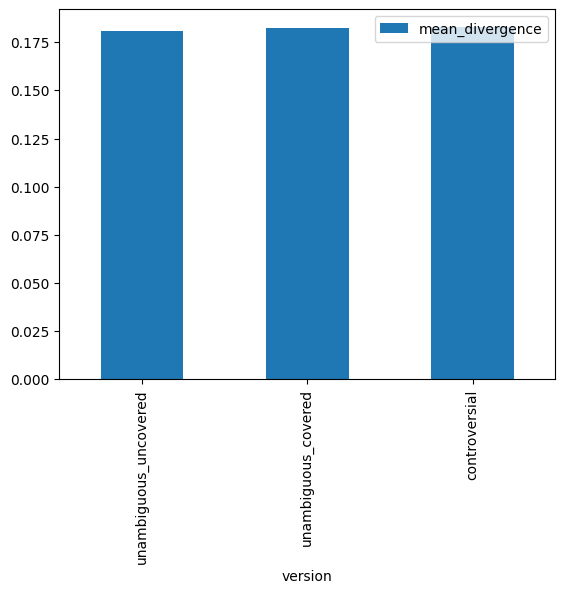

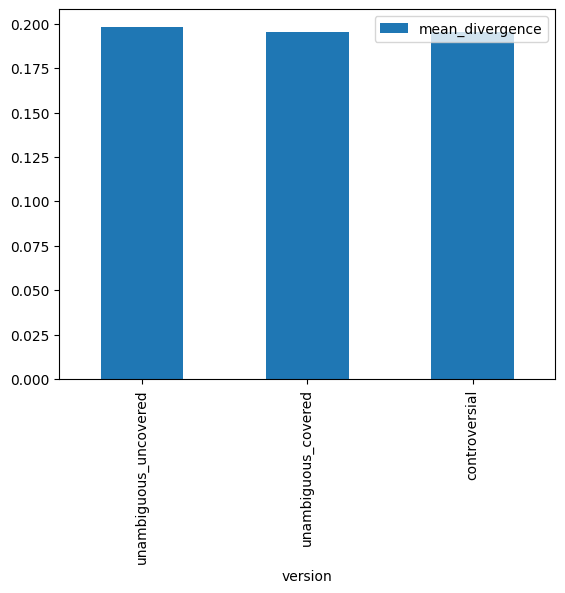

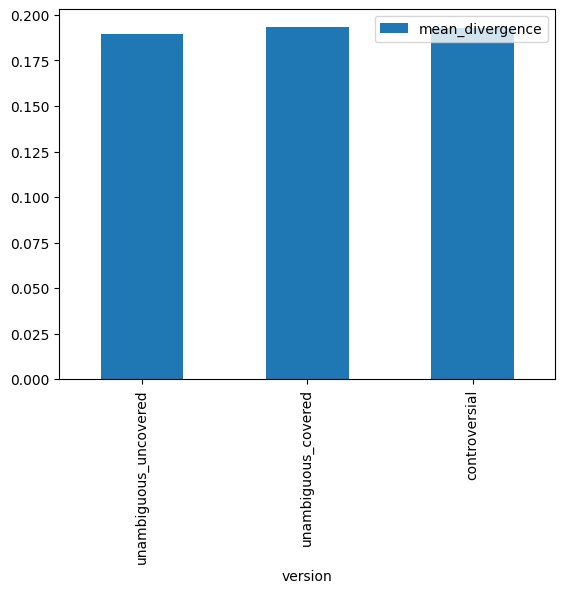

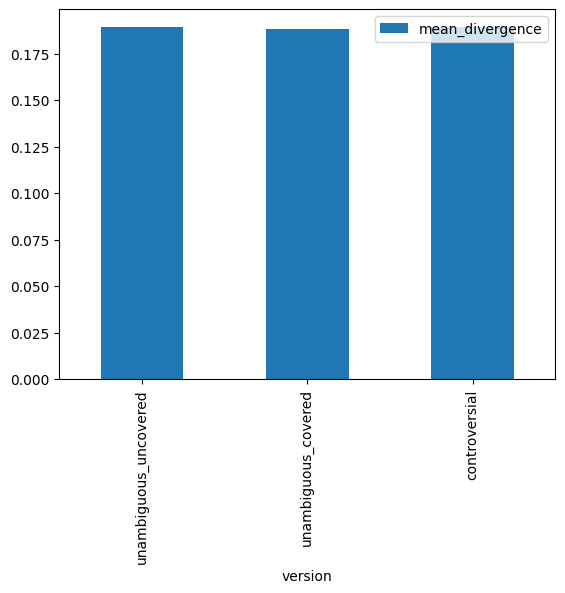

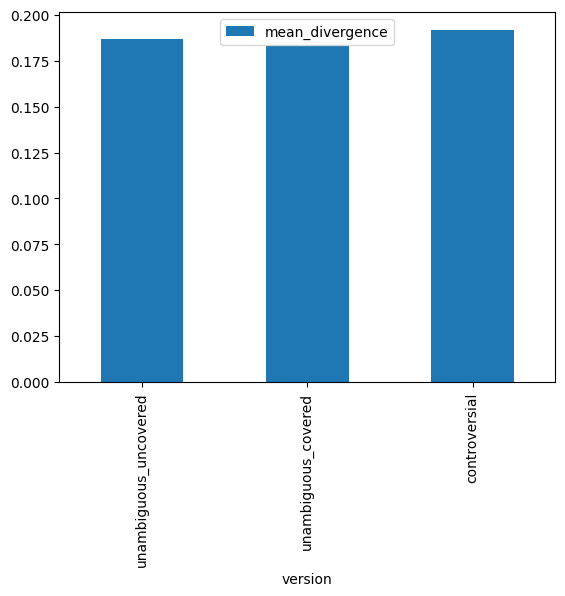

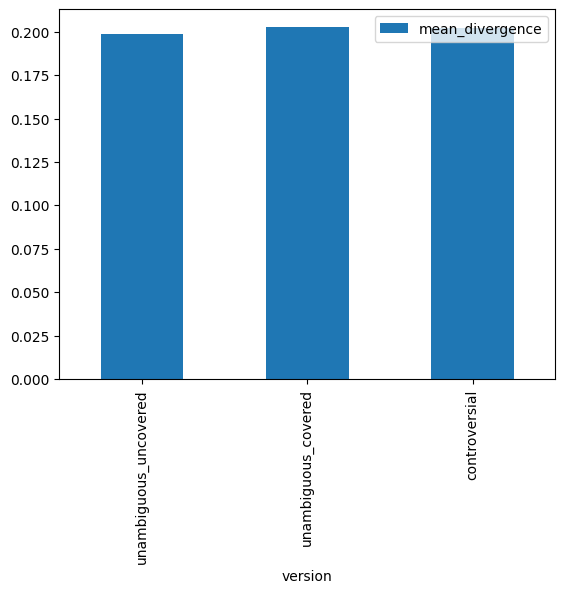

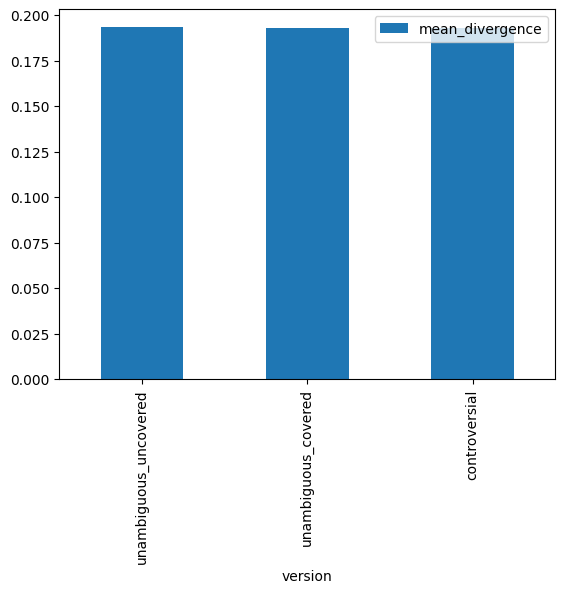

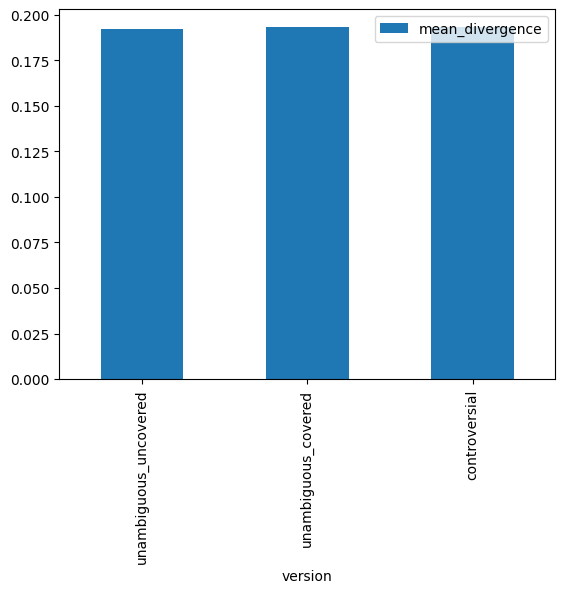

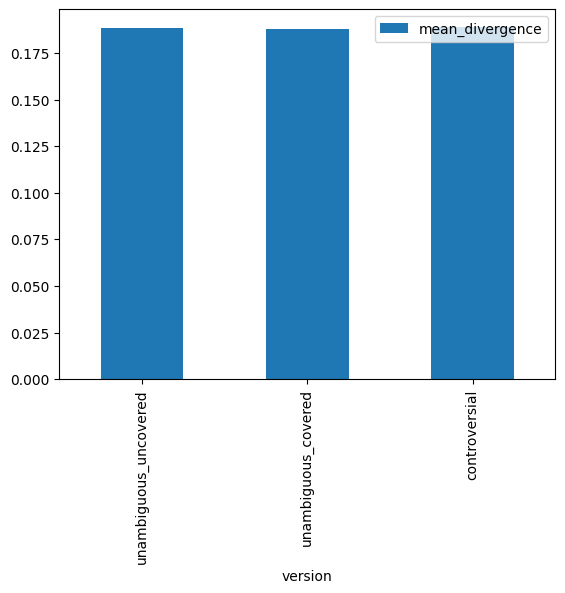

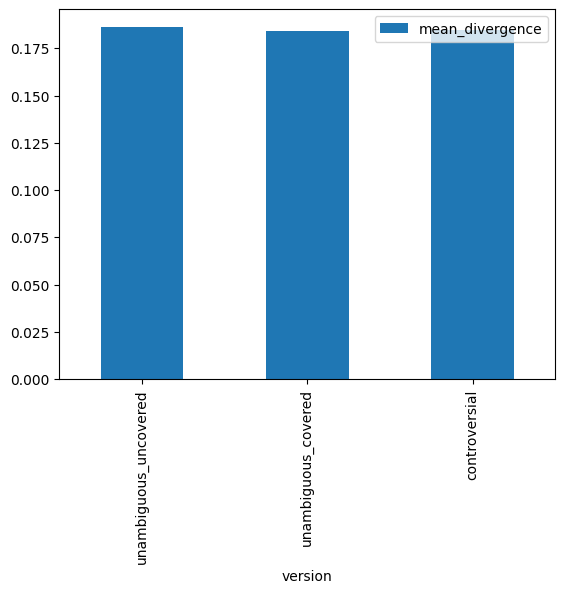

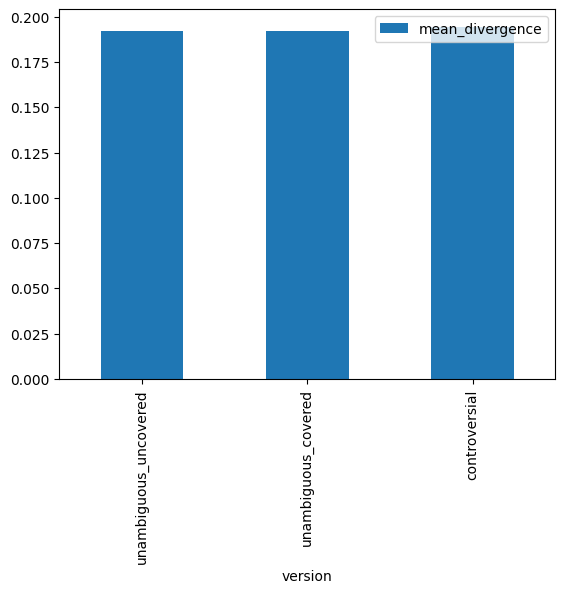

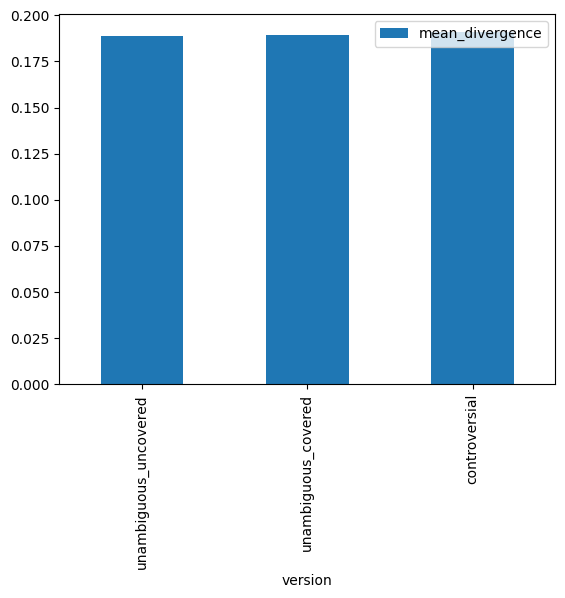

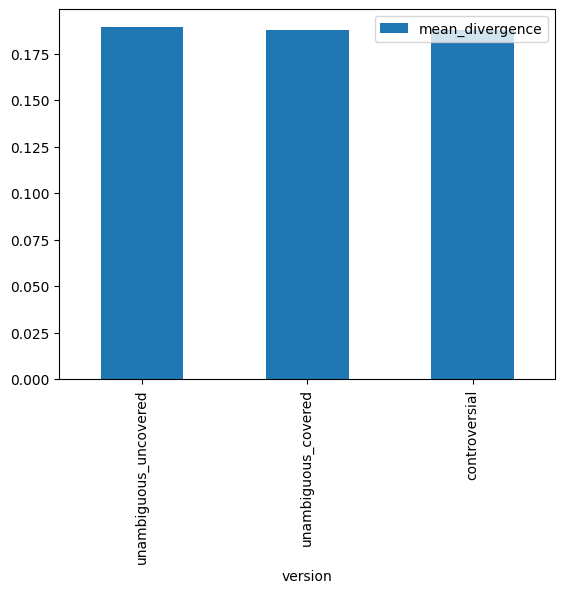

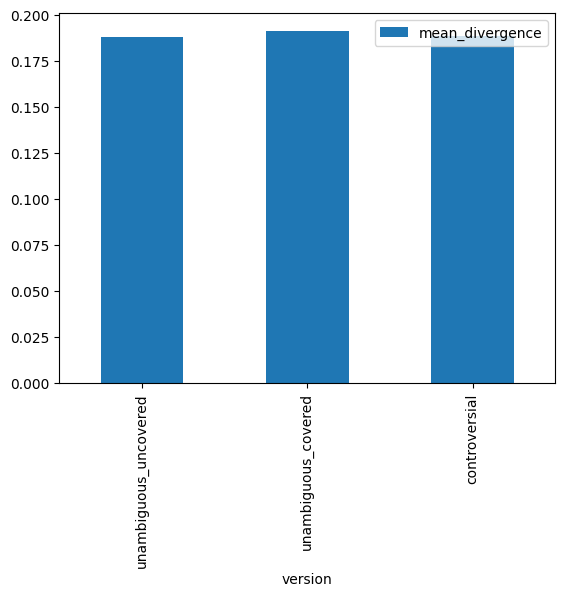

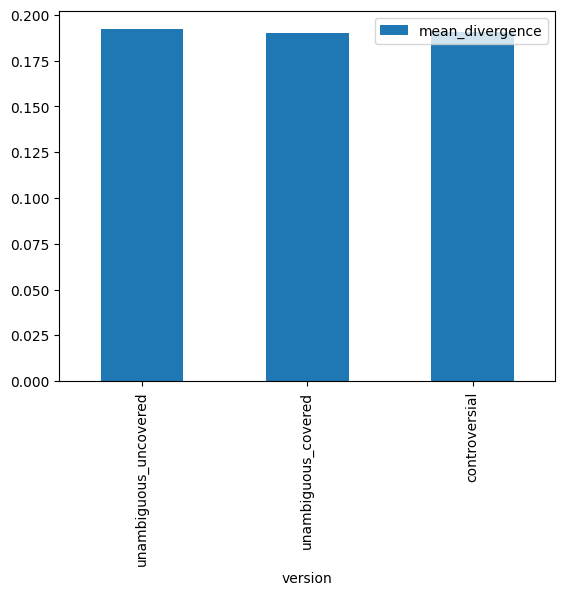

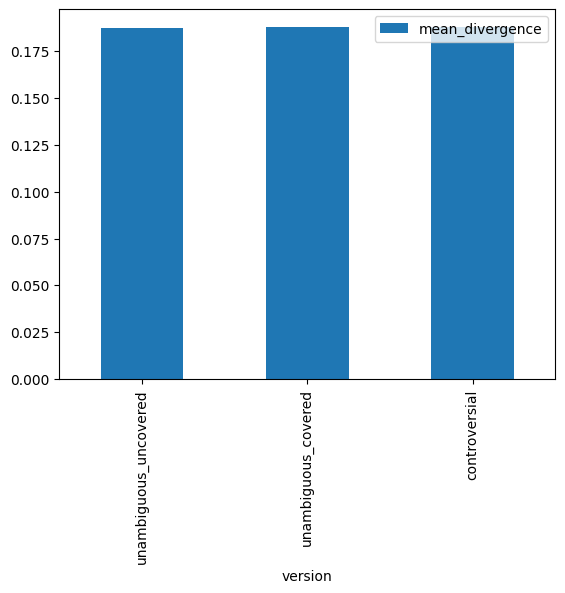

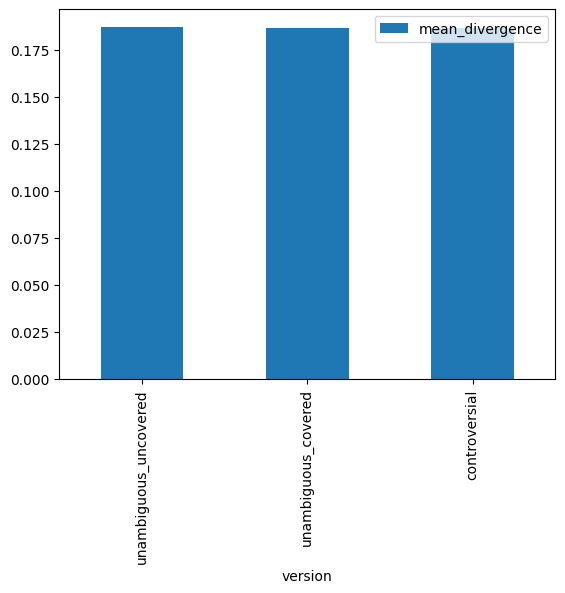

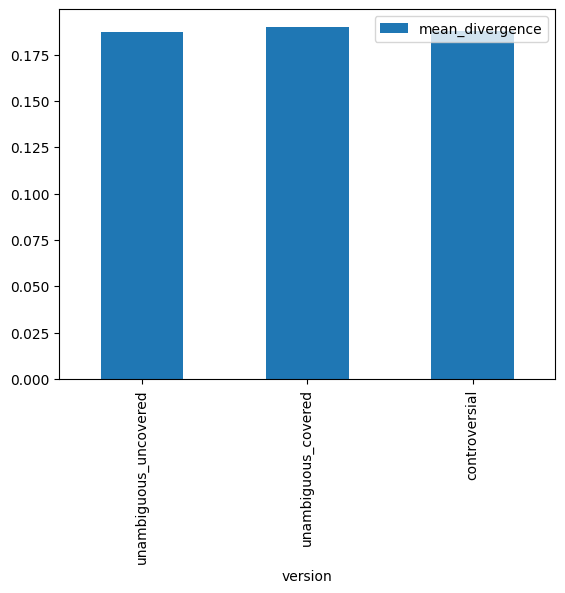

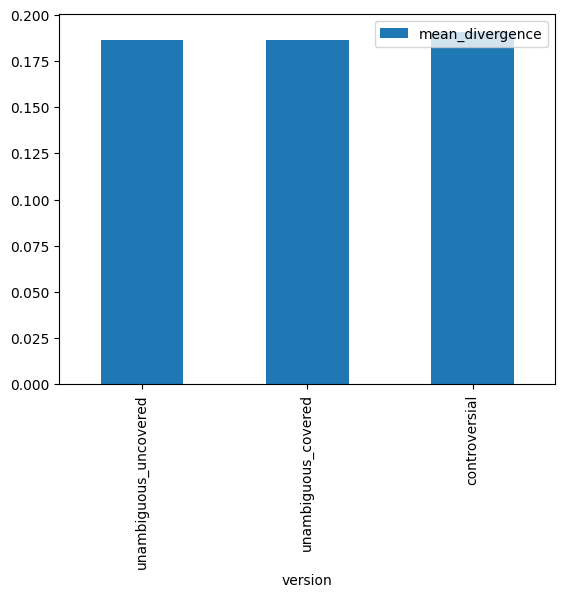

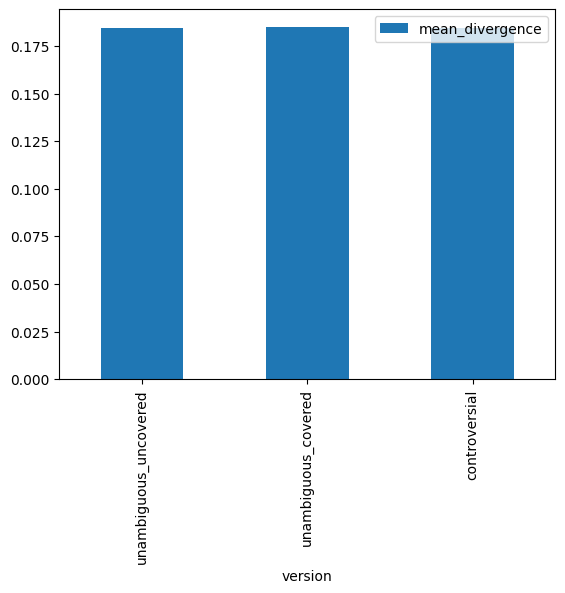

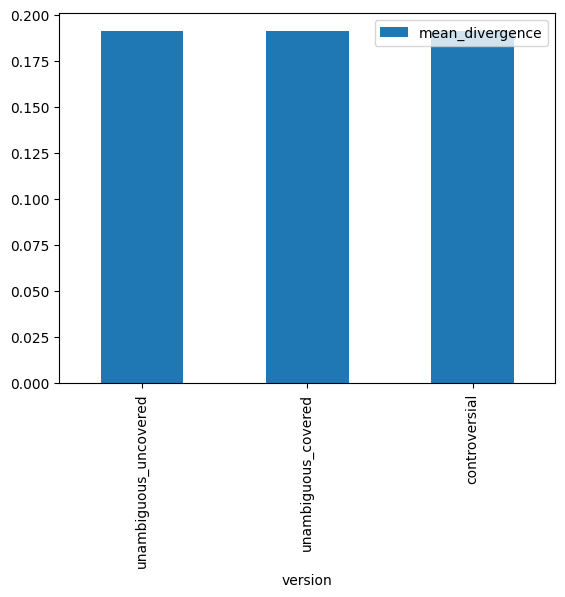

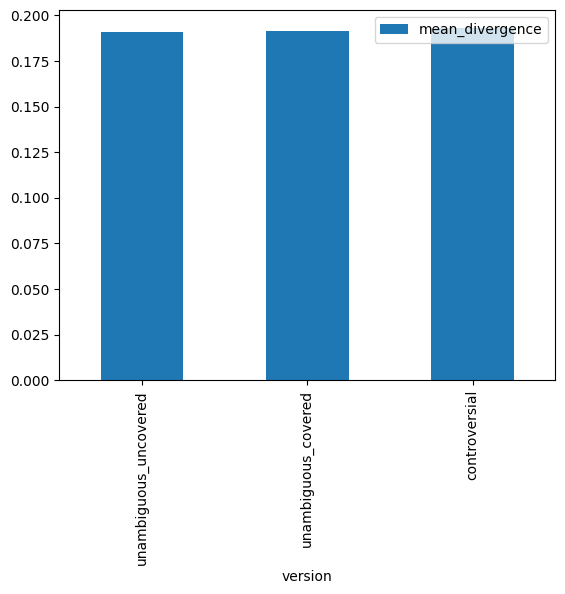

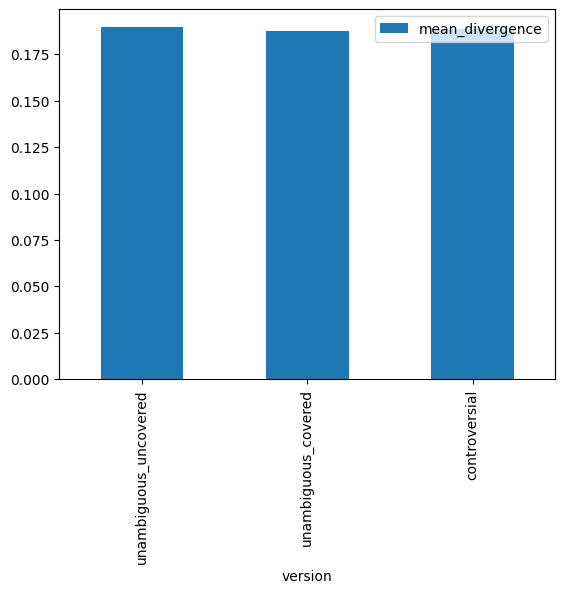

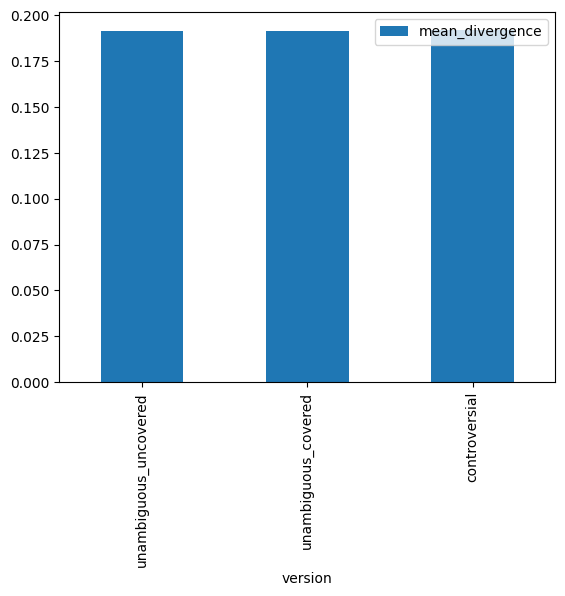

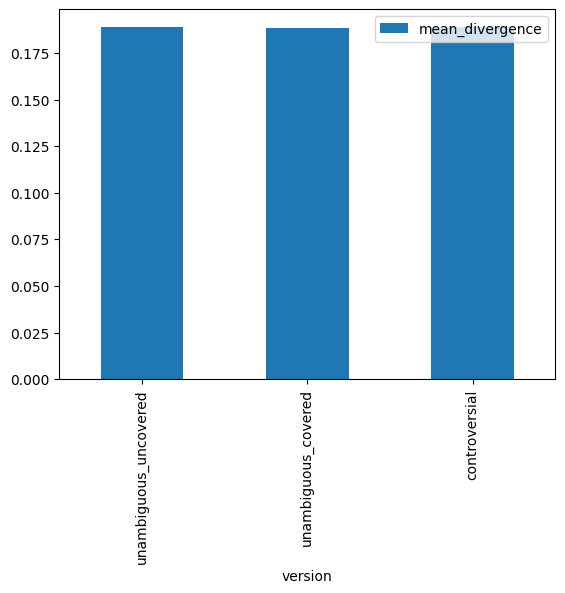

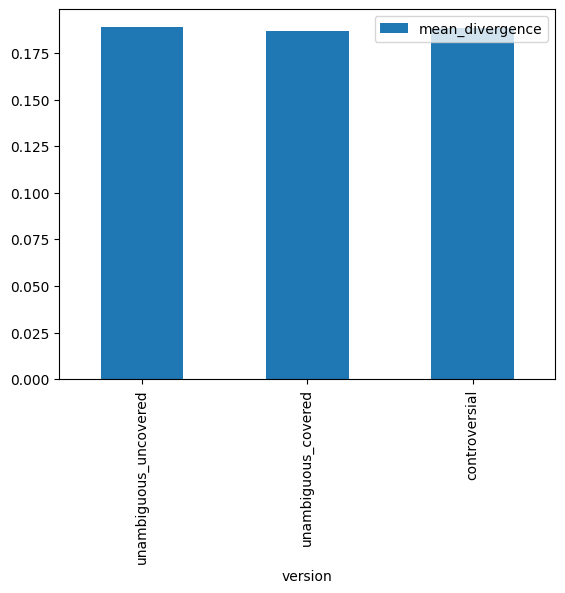

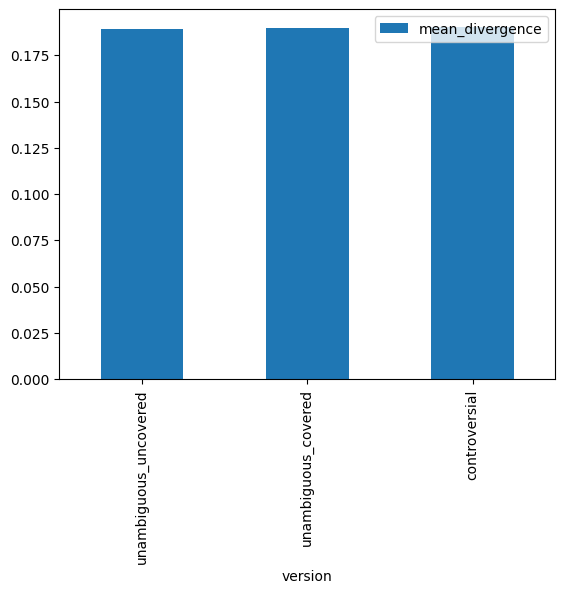

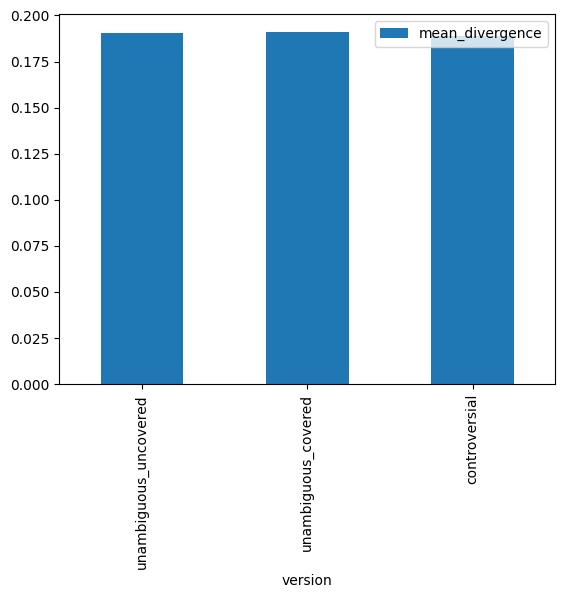

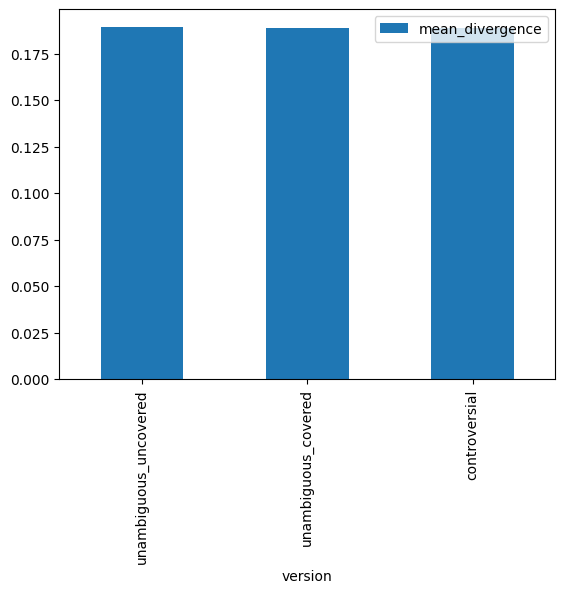

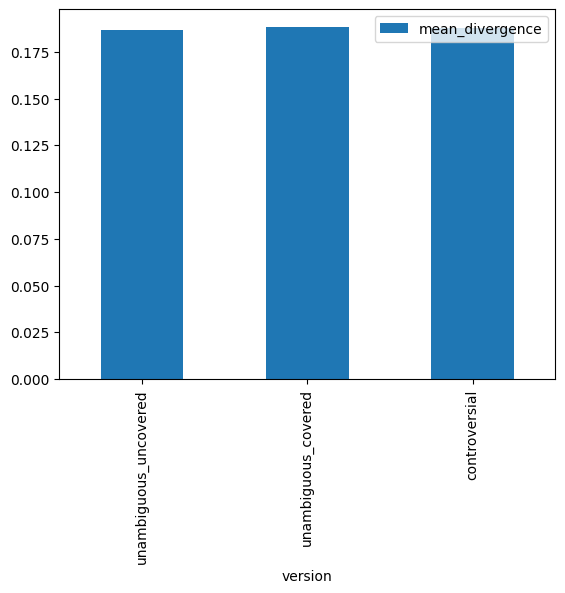

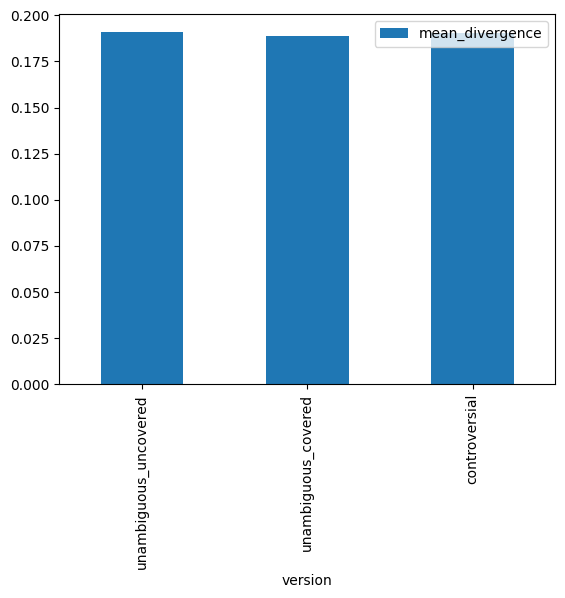

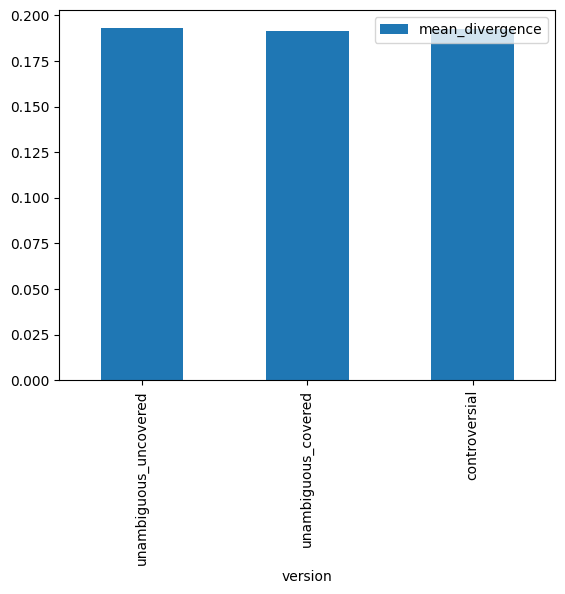

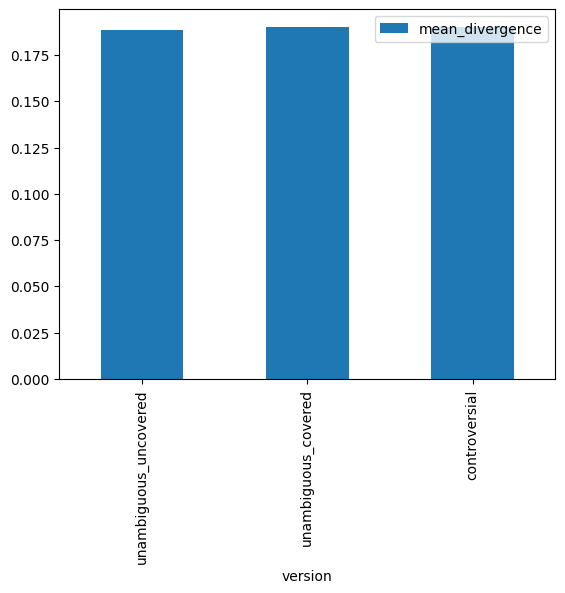

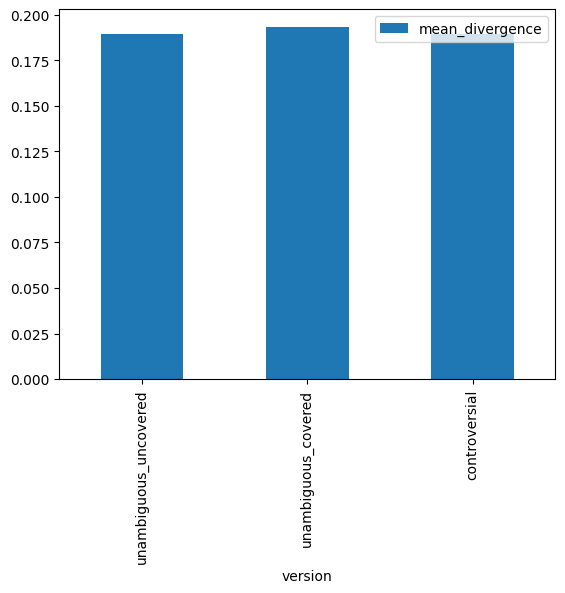

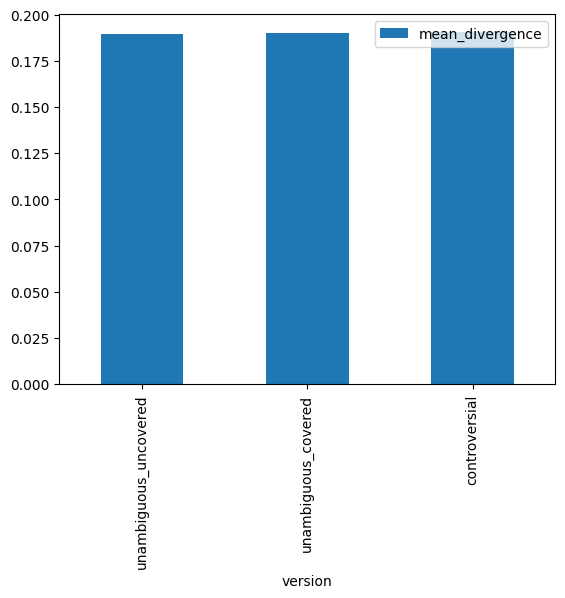

In [12]:
for i, df in op.get_item_divergences(divergences).groupby('title', sort=False, as_index=False):
    df.plot(kind='bar', x= 'version', y='mean_divergence')